In [97]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
import time

In [98]:
url = 'https://www.flipkart.com/search?q=mobiles&otracker=AS_Query_HistoryAutoSuggest_2_0&otracker1=AS_Query_HistoryAutoSuggest_2_0&marketplace=FLIPKART&as-show=on&as=off&as-pos=2&as-type=HISTORY&p%5B%5D=facets.price_range.from%3DMin&p%5B%5D=facets.price_range.to%3D50000&p%5B%5D=facets.brand%255B%255D%3Drealme&p%5B%5D=facets.brand%255B%255D%3DPOCO&p%5B%5D=facets.brand%255B%255D%3DInfinix&p%5B%5D=facets.brand%255B%255D%3DSAMSUNG&p%5B%5D=facets.brand%255B%255D%3DMi&p%5B%5D=facets.brand%255B%255D%3DBlackBerry&p%5B%5D=facets.brand%255B%255D%3DCelkon&p%5B%5D=facets.brand%255B%255D%3DDELL&p%5B%5D=facets.brand%255B%255D%3DGIVA&p%5B%5D=facets.brand%255B%255D%3DHonor&p%5B%5D=facets.brand%255B%255D%3DHTC&p%5B%5D=facets.brand%255B%255D%3DHP&p%5B%5D=facets.brand%255B%255D%3DHuawei&p%5B%5D=facets.brand%255B%255D%3Diball&p%5B%5D=facets.brand%255B%255D%3DINOVU&p%5B%5D=facets.brand%255B%255D%3DInfocus&p%5B%5D=facets.brand%255B%255D%3DIntex&p%5B%5D=facets.brand%255B%255D%3DItel&p%5B%5D=facets.brand%255B%255D%3DKARBONN&p%5B%5D=facets.brand%255B%255D%3DLAVA&p%5B%5D=facets.brand%255B%255D%3DLenovo&p%5B%5D=facets.brand%255B%255D%3DLG&p%5B%5D=facets.brand%255B%255D%3DMICROSOFT&p%5B%5D=facets.brand%255B%255D%3DMOTOROLA&p%5B%5D=facets.brand%255B%255D%3DPHILIPS&p%5B%5D=facets.brand%255B%255D%3DPanasonic&p%5B%5D=facets.brand%255B%255D%3DREDMI&p%5B%5D=facets.brand%255B%255D%3DSONY&p%5B%5D=facets.brand%255B%255D%3DSony%2BEricsson&p%5B%5D=facets.brand%255B%255D%3Dvivo&p%5B%5D=facets.brand%255B%255D%3DVodafone&p%5B%5D=facets.brand%255B%255D%3DZen'

In [99]:
page = requests.get(url)

In [100]:
page.status_code

200

In [101]:
pagecontent = page.text

In [103]:
soup = BeautifulSoup(pagecontent)

In [108]:
for x in soup.find_all('div', attrs={'class' : "_4rR01T"}):
    print(x.text)

POCO C31 (Royal Blue, 64 GB)
SAMSUNG Galaxy F22 (Denim Blue, 64 GB)
POCO C31 (Royal Blue, 32 GB)
POCO C31 (Shadow Gray, 64 GB)
Infinix HOT 12 Play (Horizon Blue, 64 GB)
realme 9 (Sunburst Gold, 128 GB)
SAMSUNG Galaxy F22 (Denim Black, 64 GB)
realme C31 (Dark Green, 32 GB)
realme C11 2021 (Cool Blue, 32 GB)
realme C11 2021 (Cool Grey, 32 GB)
SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)
Infinix HOT 12 Play (Daylight Green, 64 GB)
Infinix HOT 12 Play (Racing Black, 64 GB)
vivo T1X (Gravity Black, 128 GB)
SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)
vivo T1X (Gravity Black, 64 GB)
vivo T1X (Space Blue, 128 GB)
SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)
realme C31 (Dark Green, 64 GB)
realme C11 2021 (Cool Blue, 64 GB)
realme C11 2021 (Cool Grey, 64 GB)
realme C31 (Light Silver, 32 GB)
REDMI 9i Sport (Coral Green, 64 GB)
REDMI Note 10T 5G (Mint Green, 128 GB)


In [109]:
for x in soup.find_all('div', attrs={'class' : "_1_WHN1"}):
    print(x.text)

₹7,999
₹10,499
₹6,999
₹7,999
₹8,499
₹17,499
₹10,499
₹8,599
₹7,499
₹7,499
₹11,999
₹8,499
₹8,499
₹14,999
₹11,999
₹11,999
₹14,999
₹11,999
₹9,999
₹8,999
₹8,999
₹8,599
₹8,799
₹13,999


In [110]:
for x in soup.find_all('div' , attrs={'class':'_3LWZlK'}):
    print(x.text)

4.4
4.3
4.4
4.4
4.3
4.4
4.3
4.6
4.4
4.4
4.3
4.3
4.3
5
4.3
4.6
5
4.3
4.4
4.3
4.3
4.6
4.4
4.3


### productname, price ,specifications ,ratings ,pagenum

In [111]:
productname=[]
price=[]
specifications=[]
rating=[]
pagenum=[]



for i in range(1,51):
    start_time = time.time()
    url = 'https://www.flipkart.com/search?q=mobiles&otracker=AS_Query_HistoryAutoSuggest_2_0&otracker1=AS_Query_HistoryAutoSuggest_2_0&marketplace=FLIPKART&as-show=on&as=off&as-pos=2&as-type=HISTORY&p%5B%5D=facets.price_range.from%3DMin&p%5B%5D=facets.price_range.to%3D50000&p%5B%5D=facets.brand%255B%255D%3Drealme&p%5B%5D=facets.brand%255B%255D%3DPOCO&p%5B%5D=facets.brand%255B%255D%3DInfinix&p%5B%5D=facets.brand%255B%255D%3DSAMSUNG&p%5B%5D=facets.brand%255B%255D%3DMi&p%5B%5D=facets.brand%255B%255D%3DBlackBerry&p%5B%5D=facets.brand%255B%255D%3DCelkon&p%5B%5D=facets.brand%255B%255D%3DDELL&p%5B%5D=facets.brand%255B%255D%3DGIVA&p%5B%5D=facets.brand%255B%255D%3DHonor&p%5B%5D=facets.brand%255B%255D%3DHTC&p%5B%5D=facets.brand%255B%255D%3DHP&p%5B%5D=facets.brand%255B%255D%3DHuawei&p%5B%5D=facets.brand%255B%255D%3Diball&p%5B%5D=facets.brand%255B%255D%3DINOVU&p%5B%5D=facets.brand%255B%255D%3DInfocus&p%5B%5D=facets.brand%255B%255D%3DIntex&p%5B%5D=facets.brand%255B%255D%3DItel&p%5B%5D=facets.brand%255B%255D%3DKARBONN&p%5B%5D=facets.brand%255B%255D%3DLAVA&p%5B%5D=facets.brand%255B%255D%3DLenovo&p%5B%5D=facets.brand%255B%255D%3DLG&p%5B%5D=facets.brand%255B%255D%3DMICROSOFT&p%5B%5D=facets.brand%255B%255D%3DMOTOROLA&p%5B%5D=facets.brand%255B%255D%3DPHILIPS&p%5B%5D=facets.brand%255B%255D%3DPanasonic&p%5B%5D=facets.brand%255B%255D%3DREDMI&p%5B%5D=facets.brand%255B%255D%3DSONY&p%5B%5D=facets.brand%255B%255D%3DSony%2BEricsson&p%5B%5D=facets.brand%255B%255D%3Dvivo&p%5B%5D=facets.brand%255B%255D%3DVodafone&p%5B%5D=facets.brand%255B%255D%3DZen&page={}'.format(i)
    page = requests.get(url)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)
    
    for x in soup.find_all('div', attrs={'class': '_2kHMtA'}):
        pname = x.find('div', attrs={'class' : "_4rR01T"})
        cost = x.find('div', attrs={'class' : "_1_WHN1"})
        features = x.find('ul' , attrs={'class':'_1xgFaf'})
        ratng = x.find('div' , attrs={'class':'_3LWZlK'})
        
        
        if pname is None:
            productname.append(np.NaN)
        else:
            productname.append(pname.text)
        
        if cost is None:
            price.append(np.NaN)
        else:
            price.append(cost.text)
        
        if features is None:
            specifications.append(np.NaN)
        else:
            specifications.append(features.text)
        
        if ratng is None:
            rating.append(np.NaN)
        else:
            rating.append(ratng.text)
        
        pagenum.append(i)

    print('Page {} completed in {} seconds'.format(i, time.time() -  start_time))

Page 1 completed in 0.9799239635467529 seconds
Page 2 completed in 1.2190601825714111 seconds
Page 3 completed in 0.8323707580566406 seconds
Page 4 completed in 1.029771089553833 seconds
Page 5 completed in 0.6959958076477051 seconds
Page 6 completed in 0.8416991233825684 seconds
Page 7 completed in 0.7230024337768555 seconds
Page 8 completed in 0.6776854991912842 seconds
Page 9 completed in 0.941687822341919 seconds
Page 10 completed in 1.8669953346252441 seconds
Page 11 completed in 0.8100991249084473 seconds
Page 12 completed in 0.6909124851226807 seconds
Page 13 completed in 0.8352818489074707 seconds
Page 14 completed in 0.6904032230377197 seconds
Page 15 completed in 0.7823152542114258 seconds
Page 16 completed in 0.8589868545532227 seconds
Page 17 completed in 0.895451545715332 seconds
Page 18 completed in 0.7928571701049805 seconds
Page 19 completed in 0.588512659072876 seconds
Page 20 completed in 0.7072172164916992 seconds
Page 21 completed in 0.6152470111846924 seconds
Page 

In [112]:
len(productname)

984

In [113]:
mobile_df = pd.DataFrame({'productname':productname , 'price': price , 'specifications': specifications , 'rating':rating , 'pagenumber': pagenum})

In [114]:
mobile_df.head()

,productname,price,specifications,rating,pagenumber
0,"POCO C31 (Royal Blue, 64 GB)","₹7,999",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,4.4,1
1,"POCO C31 (Shadow Gray, 64 GB)","₹7,999",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,4.4,1
2,"POCO C31 (Royal Blue, 32 GB)","₹6,999",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB1...,4.4,1
3,"SAMSUNG Galaxy F22 (Denim Blue, 64 GB)","₹10,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3,1
4,"Infinix HOT 12 Play (Horizon Blue, 64 GB)","₹8,499",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,4.3,1


In [115]:
mobile_df['productname'].unique()

array(['POCO C31 (Royal Blue, 64 GB)', 'POCO C31 (Shadow Gray, 64 GB)',
       'POCO C31 (Royal Blue, 32 GB)',
       'SAMSUNG Galaxy F22 (Denim Blue, 64 GB)',
       'Infinix HOT 12 Play (Horizon Blue, 64 GB)',
       'realme 9 (Sunburst Gold, 128 GB)',
       'SAMSUNG Galaxy F22 (Denim Black, 64 GB)',
       'realme C11 2021 (Cool Blue, 32 GB)',
       'realme C11 2021 (Cool Grey, 32 GB)',
       'SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)',
       'realme C31 (Dark Green, 32 GB)',
       'Infinix HOT 12 Play (Racing Black, 64 GB)',
       'Infinix HOT 12 Play (Daylight Green, 64 GB)',
       'SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)',
       'vivo T1X (Gravity Black, 64 GB)',
       'vivo T1X (Gravity Black, 128 GB)',
       'vivo T1X (Space Blue, 128 GB)',
       'SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)',
       'realme C11 2021 (Cool Blue, 64 GB)',
       'realme C11 2021 (Cool Grey, 64 GB)',
       'realme C31 (Dark Green, 64 GB)',
       'realme C31 (Light Silver, 32 GB)',


In [116]:
mobile_df.tail()

,productname,price,specifications,rating,pagenumber
979,"realme 6 (Comet Blue, 64 GB)","₹13,999",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,4.4,41
980,KARBONN KU3 power,"₹1,199",32 MB RAM | 32 MB ROM4.57 cm (1.8 inch) Displa...,NaN,41
981,"Mi A2 (Red, 64 GB)","₹17,499",4 GB RAM | 64 GB ROM15.21 cm (5.99 inch) Full ...,4.2,41
982,KARBONN KU3 power,"₹1,199",32 MB RAM | 32 MB ROM4.57 cm (1.8 inch) Displa...,NaN,41
983,"SAMSUNG Galaxy M32 (Black, 128 GB)","₹15,985",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,4.2,41


In [117]:
mobile_df['productname'] = mobile_df['productname'].apply(lambda x: ''.join(x))

In [118]:
mobile_df['price'] = mobile_df['price'].apply(lambda x: ''.join(x))

In [119]:
mobile_df.to_csv('mobile_df.csv')

In [120]:
mobile_df['productname'][5]

'realme 9 (Sunburst Gold, 128 GB)'

In [121]:
mobile_df['specifications'][0]

'4 GB RAM | 64 GB ROM | Expandable Upto 512 GB16.59 cm (6.53 inch) HD+ Display13MP + 2MP + 2MP | 5MP Front Camera5000 mAh Lithium-ion Polymer BatteryMediaTek Helio G35 Processor1 Year Warranty for Handset, 6 Months for Accessories'

In [122]:
# extract brand
regex = r'^\w+'
mobile_df['brand']= mobile_df['productname'].apply(lambda x: re.compile(regex).findall(x))

In [123]:
mobile_df.tail()

,productname,price,specifications,rating,pagenumber,brand
979,"realme 6 (Comet Blue, 64 GB)","₹13,999",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,4.4,41,[realme]
980,KARBONN KU3 power,"₹1,199",32 MB RAM | 32 MB ROM4.57 cm (1.8 inch) Displa...,NaN,41,[KARBONN]
981,"Mi A2 (Red, 64 GB)","₹17,499",4 GB RAM | 64 GB ROM15.21 cm (5.99 inch) Full ...,4.2,41,[Mi]
982,KARBONN KU3 power,"₹1,199",32 MB RAM | 32 MB ROM4.57 cm (1.8 inch) Displa...,NaN,41,[KARBONN]
983,"SAMSUNG Galaxy M32 (Black, 128 GB)","₹15,985",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,4.2,41,[SAMSUNG]


In [124]:
# extract RAM
regex = r'[0-9]+\s(?:MB|GB)\s+RAM'
mobile_df['RAM']= mobile_df['specifications'].apply(lambda x: re.compile(regex).findall(x))

In [125]:
mobile_df.tail()

,productname,price,specifications,rating,pagenumber,brand,RAM
979,"realme 6 (Comet Blue, 64 GB)","₹13,999",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,4.4,41,[realme],[4 GB RAM]
980,KARBONN KU3 power,"₹1,199",32 MB RAM | 32 MB ROM4.57 cm (1.8 inch) Displa...,NaN,41,[KARBONN],[32 MB RAM]
981,"Mi A2 (Red, 64 GB)","₹17,499",4 GB RAM | 64 GB ROM15.21 cm (5.99 inch) Full ...,4.2,41,[Mi],[4 GB RAM]
982,KARBONN KU3 power,"₹1,199",32 MB RAM | 32 MB ROM4.57 cm (1.8 inch) Displa...,NaN,41,[KARBONN],[32 MB RAM]
983,"SAMSUNG Galaxy M32 (Black, 128 GB)","₹15,985",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,4.2,41,[SAMSUNG],[6 GB RAM]


In [126]:
# extract storage
regex = r'[0-9\s]+(?:MB|GB)\s+ROM'
mobile_df['storage']= mobile_df['specifications'].apply(lambda x: re.compile(regex).findall(x))

In [127]:
mobile_df.tail()

,productname,price,specifications,rating,pagenumber,brand,RAM,storage
979,"realme 6 (Comet Blue, 64 GB)","₹13,999",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,4.4,41,[realme],[4 GB RAM],[ 64 GB ROM]
980,KARBONN KU3 power,"₹1,199",32 MB RAM | 32 MB ROM4.57 cm (1.8 inch) Displa...,NaN,41,[KARBONN],[32 MB RAM],[ 32 MB ROM]
981,"Mi A2 (Red, 64 GB)","₹17,499",4 GB RAM | 64 GB ROM15.21 cm (5.99 inch) Full ...,4.2,41,[Mi],[4 GB RAM],[ 64 GB ROM]
982,KARBONN KU3 power,"₹1,199",32 MB RAM | 32 MB ROM4.57 cm (1.8 inch) Displa...,NaN,41,[KARBONN],[32 MB RAM],[ 32 MB ROM]
983,"SAMSUNG Galaxy M32 (Black, 128 GB)","₹15,985",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,4.2,41,[SAMSUNG],[6 GB RAM],[ 128 GB ROM]


In [128]:
# extract colour
regex = r'\w+,'
mobile_df['colour']= mobile_df['productname'].apply(lambda x: re.compile(regex).findall(x))

In [129]:
mobile_df.tail()

,productname,price,specifications,rating,pagenumber,brand,RAM,storage,colour
979,"realme 6 (Comet Blue, 64 GB)","₹13,999",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,4.4,41,[realme],[4 GB RAM],[ 64 GB ROM],"[Blue,]"
980,KARBONN KU3 power,"₹1,199",32 MB RAM | 32 MB ROM4.57 cm (1.8 inch) Displa...,NaN,41,[KARBONN],[32 MB RAM],[ 32 MB ROM],[]
981,"Mi A2 (Red, 64 GB)","₹17,499",4 GB RAM | 64 GB ROM15.21 cm (5.99 inch) Full ...,4.2,41,[Mi],[4 GB RAM],[ 64 GB ROM],"[Red,]"
982,KARBONN KU3 power,"₹1,199",32 MB RAM | 32 MB ROM4.57 cm (1.8 inch) Displa...,NaN,41,[KARBONN],[32 MB RAM],[ 32 MB ROM],[]
983,"SAMSUNG Galaxy M32 (Black, 128 GB)","₹15,985",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,4.2,41,[SAMSUNG],[6 GB RAM],[ 128 GB ROM],"[Black,]"


In [130]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   productname     984 non-null    object
 1   price           984 non-null    object
 2   specifications  984 non-null    object
 3   rating          975 non-null    object
 4   pagenumber      984 non-null    int64 
 5   brand           984 non-null    object
 6   RAM             984 non-null    object
 7   storage         984 non-null    object
 8   colour          984 non-null    object
dtypes: int64(1), object(8)
memory usage: 69.3+ KB


In [131]:
mobile_df.isnull().sum()

productname       0
price             0
specifications    0
rating            9
pagenumber        0
brand             0
RAM               0
storage           0
colour            0
dtype: int64

In [132]:
mobile_df['brand'] = mobile_df['brand'].apply(lambda x: ''.join(x))
mobile_df['RAM'] = mobile_df['RAM'].apply(lambda x: ''.join(x))
mobile_df['storage'] = mobile_df['storage'].apply(lambda x: ''.join(x))
mobile_df['colour'] = mobile_df['colour'].apply(lambda x : ''.join(x))
mobile_df['price'] = mobile_df['price'].apply(lambda x: x.replace('₹','').replace(",",'')).astype(float)
mobile_df['colour'] = mobile_df['colour'].apply(lambda x: x.replace(',',''))

In [133]:
mobile_df.tail()

,productname,price,specifications,rating,pagenumber,brand,RAM,storage,colour
979,"realme 6 (Comet Blue, 64 GB)",13999.0,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,4.4,41,realme,4 GB RAM,64 GB ROM,Blue
980,KARBONN KU3 power,1199.0,32 MB RAM | 32 MB ROM4.57 cm (1.8 inch) Displa...,NaN,41,KARBONN,32 MB RAM,32 MB ROM,
981,"Mi A2 (Red, 64 GB)",17499.0,4 GB RAM | 64 GB ROM15.21 cm (5.99 inch) Full ...,4.2,41,Mi,4 GB RAM,64 GB ROM,Red
982,KARBONN KU3 power,1199.0,32 MB RAM | 32 MB ROM4.57 cm (1.8 inch) Displa...,NaN,41,KARBONN,32 MB RAM,32 MB ROM,
983,"SAMSUNG Galaxy M32 (Black, 128 GB)",15985.0,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,4.2,41,SAMSUNG,6 GB RAM,128 GB ROM,Black


In [134]:
mobile_df.isnull().sum()

productname       0
price             0
specifications    0
rating            9
pagenumber        0
brand             0
RAM               0
storage           0
colour            0
dtype: int64

In [135]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   productname     984 non-null    object 
 1   price           984 non-null    float64
 2   specifications  984 non-null    object 
 3   rating          975 non-null    object 
 4   pagenumber      984 non-null    int64  
 5   brand           984 non-null    object 
 6   RAM             984 non-null    object 
 7   storage         984 non-null    object 
 8   colour          984 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 69.3+ KB


In [136]:
mobile_df = mobile_df.fillna(0)

In [137]:
mobile_df.tail()

,productname,price,specifications,rating,pagenumber,brand,RAM,storage,colour
979,"realme 6 (Comet Blue, 64 GB)",13999.0,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,4.4,41,realme,4 GB RAM,64 GB ROM,Blue
980,KARBONN KU3 power,1199.0,32 MB RAM | 32 MB ROM4.57 cm (1.8 inch) Displa...,0,41,KARBONN,32 MB RAM,32 MB ROM,
981,"Mi A2 (Red, 64 GB)",17499.0,4 GB RAM | 64 GB ROM15.21 cm (5.99 inch) Full ...,4.2,41,Mi,4 GB RAM,64 GB ROM,Red
982,KARBONN KU3 power,1199.0,32 MB RAM | 32 MB ROM4.57 cm (1.8 inch) Displa...,0,41,KARBONN,32 MB RAM,32 MB ROM,
983,"SAMSUNG Galaxy M32 (Black, 128 GB)",15985.0,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,4.2,41,SAMSUNG,6 GB RAM,128 GB ROM,Black


In [138]:
mobile_df = mobile_df.replace(r'^\s*$', np.nan, regex=True)

In [139]:
mobile_df.tail()

,productname,price,specifications,rating,pagenumber,brand,RAM,storage,colour
979,"realme 6 (Comet Blue, 64 GB)",13999.0,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,4.4,41,realme,4 GB RAM,64 GB ROM,Blue
980,KARBONN KU3 power,1199.0,32 MB RAM | 32 MB ROM4.57 cm (1.8 inch) Displa...,0,41,KARBONN,32 MB RAM,32 MB ROM,NaN
981,"Mi A2 (Red, 64 GB)",17499.0,4 GB RAM | 64 GB ROM15.21 cm (5.99 inch) Full ...,4.2,41,Mi,4 GB RAM,64 GB ROM,Red
982,KARBONN KU3 power,1199.0,32 MB RAM | 32 MB ROM4.57 cm (1.8 inch) Displa...,0,41,KARBONN,32 MB RAM,32 MB ROM,NaN
983,"SAMSUNG Galaxy M32 (Black, 128 GB)",15985.0,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,4.2,41,SAMSUNG,6 GB RAM,128 GB ROM,Black


In [140]:
mobile_df = mobile_df.fillna(0)

In [141]:
mobile_df.tail()

,productname,price,specifications,rating,pagenumber,brand,RAM,storage,colour
979,"realme 6 (Comet Blue, 64 GB)",13999.0,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,4.4,41,realme,4 GB RAM,64 GB ROM,Blue
980,KARBONN KU3 power,1199.0,32 MB RAM | 32 MB ROM4.57 cm (1.8 inch) Displa...,0,41,KARBONN,32 MB RAM,32 MB ROM,0
981,"Mi A2 (Red, 64 GB)",17499.0,4 GB RAM | 64 GB ROM15.21 cm (5.99 inch) Full ...,4.2,41,Mi,4 GB RAM,64 GB ROM,Red
982,KARBONN KU3 power,1199.0,32 MB RAM | 32 MB ROM4.57 cm (1.8 inch) Displa...,0,41,KARBONN,32 MB RAM,32 MB ROM,0
983,"SAMSUNG Galaxy M32 (Black, 128 GB)",15985.0,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,4.2,41,SAMSUNG,6 GB RAM,128 GB ROM,Black


In [142]:
mobile_df.isnull().sum()

productname       0
price             0
specifications    0
rating            0
pagenumber        0
brand             0
RAM               0
storage           0
colour            0
dtype: int64

In [143]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   productname     984 non-null    object 
 1   price           984 non-null    float64
 2   specifications  984 non-null    object 
 3   rating          984 non-null    object 
 4   pagenumber      984 non-null    int64  
 5   brand           984 non-null    object 
 6   RAM             984 non-null    object 
 7   storage         984 non-null    object 
 8   colour          984 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 69.3+ KB


In [144]:
mobile_df['rating'] = mobile_df['rating'].astype(float)

In [145]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   productname     984 non-null    object 
 1   price           984 non-null    float64
 2   specifications  984 non-null    object 
 3   rating          984 non-null    float64
 4   pagenumber      984 non-null    int64  
 5   brand           984 non-null    object 
 6   RAM             984 non-null    object 
 7   storage         984 non-null    object 
 8   colour          984 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 69.3+ KB


In [146]:
# measure of central tendency
mobile_df.describe()

,price,rating,pagenumber
count,984.000000,984.000000,984.000000
mean,13592.227642,4.189126,21.000000
std,9107.759662,0.443942,11.838176
min,749.000000,0.000000,1.000000
25%,7998.750000,4.100000,11.000000
50%,12999.000000,4.300000,21.000000
75%,17990.000000,4.400000,31.000000
max,49999.000000,5.000000,41.000000


In [147]:
mobile_df['brand'] = mobile_df['brand'].apply(lambda x: x.replace('LAVA','Lava').replace('REDMI','Redmi').replace('MOTOROLA','Motorola').replace('Mi','Redmi').replace('Motorola','Moto').replace('Xiaomi','Redmi'))

In [148]:
mobile_df

,productname,price,specifications,rating,pagenumber,brand,RAM,storage,colour
0,"POCO C31 (Royal Blue, 64 GB)",7999.0,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,4.4,1,POCO,4 GB RAM,64 GB ROM,Blue
1,"POCO C31 (Shadow Gray, 64 GB)",7999.0,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,4.4,1,POCO,4 GB RAM,64 GB ROM,Gray
2,"POCO C31 (Royal Blue, 32 GB)",6999.0,3 GB RAM | 32 GB ROM | Expandable Upto 512 GB1...,4.4,1,POCO,3 GB RAM,32 GB ROM,Blue
3,"SAMSUNG Galaxy F22 (Denim Blue, 64 GB)",10499.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3,1,SAMSUNG,4 GB RAM,64 GB ROM,Blue
4,"Infinix HOT 12 Play (Horizon Blue, 64 GB)",8499.0,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,4.3,1,Infinix,4 GB RAM,64 GB ROM,Blue
...,...,...,...,...,...,...,...,...,...
979,"realme 6 (Comet Blue, 64 GB)",13999.0,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,4.4,41,realme,4 GB RAM,64 GB ROM,Blue
980,KARBONN KU3 power,1199.0,32 MB RAM | 32 MB ROM4.57 cm (1.8 inch) Displa...,0.0,41,KARBONN,32 MB RAM,32 MB ROM,0
981,"Mi A2 (Red, 64 GB)",17499.0,4 GB RAM | 64 GB ROM15.21 cm (5.99 inch) Full ...,4.2,41,Redmi,4 GB RAM,64 GB ROM,Red
982,KARBONN KU3 power,1199.0,32 MB RAM | 32 MB ROM4.57 cm (1.8 inch) Displa...,0.0,41,KARBONN,32 MB RAM,32 MB ROM,0


## removing outliers

In [149]:
mobile_df.describe()

,price,rating,pagenumber
count,984.000000,984.000000,984.000000
mean,13592.227642,4.189126,21.000000
std,9107.759662,0.443942,11.838176
min,749.000000,0.000000,1.000000
25%,7998.750000,4.100000,11.000000
50%,12999.000000,4.300000,21.000000
75%,17990.000000,4.400000,31.000000
max,49999.000000,5.000000,41.000000


In [152]:
min_thresold = mobile_df.price.quantile(0.20)
min_thresold

6830.6

In [153]:
mobile_df = mobile_df[(mobile_df.price>min_thresold)]

In [155]:
mobile_df.tail()

,productname,price,specifications,rating,pagenumber,brand,RAM,storage,colour
977,"realme 3i (Diamond Black, 32 GB)",8499.0,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...,4.4,41,realme,3 GB RAM,32 GB ROM,Black
978,"SAMSUNG Galaxy A50 (White, 64 GB)",18999.0,6 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,4.4,41,SAMSUNG,6 GB RAM,64 GB ROM,White
979,"realme 6 (Comet Blue, 64 GB)",13999.0,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,4.4,41,realme,4 GB RAM,64 GB ROM,Blue
981,"Mi A2 (Red, 64 GB)",17499.0,4 GB RAM | 64 GB ROM15.21 cm (5.99 inch) Full ...,4.2,41,Redmi,4 GB RAM,64 GB ROM,Red
983,"SAMSUNG Galaxy M32 (Black, 128 GB)",15985.0,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,4.2,41,SAMSUNG,6 GB RAM,128 GB ROM,Black


In [156]:
mobile_df.reset_index(inplace=True)

In [157]:
mobile_df

,index,productname,price,specifications,rating,pagenumber,brand,RAM,storage,colour
0,0,"POCO C31 (Royal Blue, 64 GB)",7999.0,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,4.4,1,POCO,4 GB RAM,64 GB ROM,Blue
1,1,"POCO C31 (Shadow Gray, 64 GB)",7999.0,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,4.4,1,POCO,4 GB RAM,64 GB ROM,Gray
2,2,"POCO C31 (Royal Blue, 32 GB)",6999.0,3 GB RAM | 32 GB ROM | Expandable Upto 512 GB1...,4.4,1,POCO,3 GB RAM,32 GB ROM,Blue
3,3,"SAMSUNG Galaxy F22 (Denim Blue, 64 GB)",10499.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3,1,SAMSUNG,4 GB RAM,64 GB ROM,Blue
4,4,"Infinix HOT 12 Play (Horizon Blue, 64 GB)",8499.0,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,4.3,1,Infinix,4 GB RAM,64 GB ROM,Blue
...,...,...,...,...,...,...,...,...,...,...
782,977,"realme 3i (Diamond Black, 32 GB)",8499.0,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...,4.4,41,realme,3 GB RAM,32 GB ROM,Black
783,978,"SAMSUNG Galaxy A50 (White, 64 GB)",18999.0,6 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,4.4,41,SAMSUNG,6 GB RAM,64 GB ROM,White
784,979,"realme 6 (Comet Blue, 64 GB)",13999.0,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,4.4,41,realme,4 GB RAM,64 GB ROM,Blue
785,981,"Mi A2 (Red, 64 GB)",17499.0,4 GB RAM | 64 GB ROM15.21 cm (5.99 inch) Full ...,4.2,41,Redmi,4 GB RAM,64 GB ROM,Red


# EDA

### univariate analysis

<AxesSubplot:xlabel='brand'>

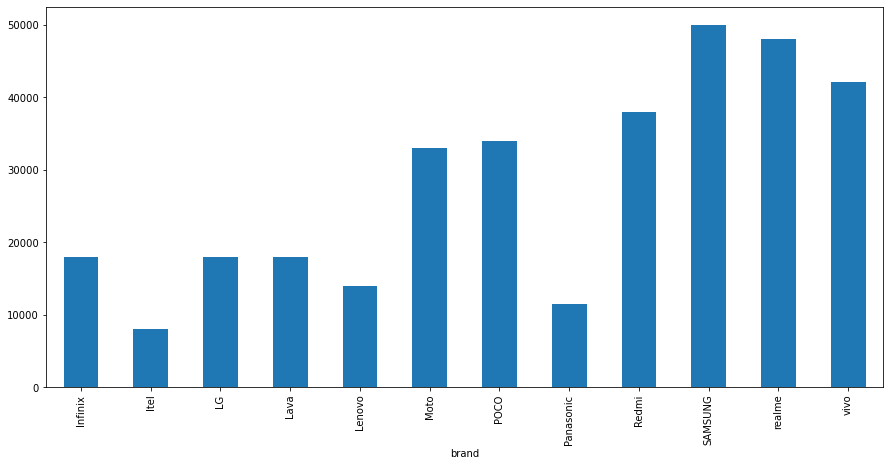

In [158]:
plt.figure(figsize=(15, 7))
mobile_df.groupby(['brand'])['price'].max().plot(kind = 'bar')

<AxesSubplot:>

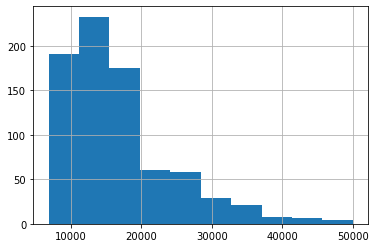

In [159]:
mobile_df['price'].hist()

<AxesSubplot:xlabel='brand', ylabel='count'>

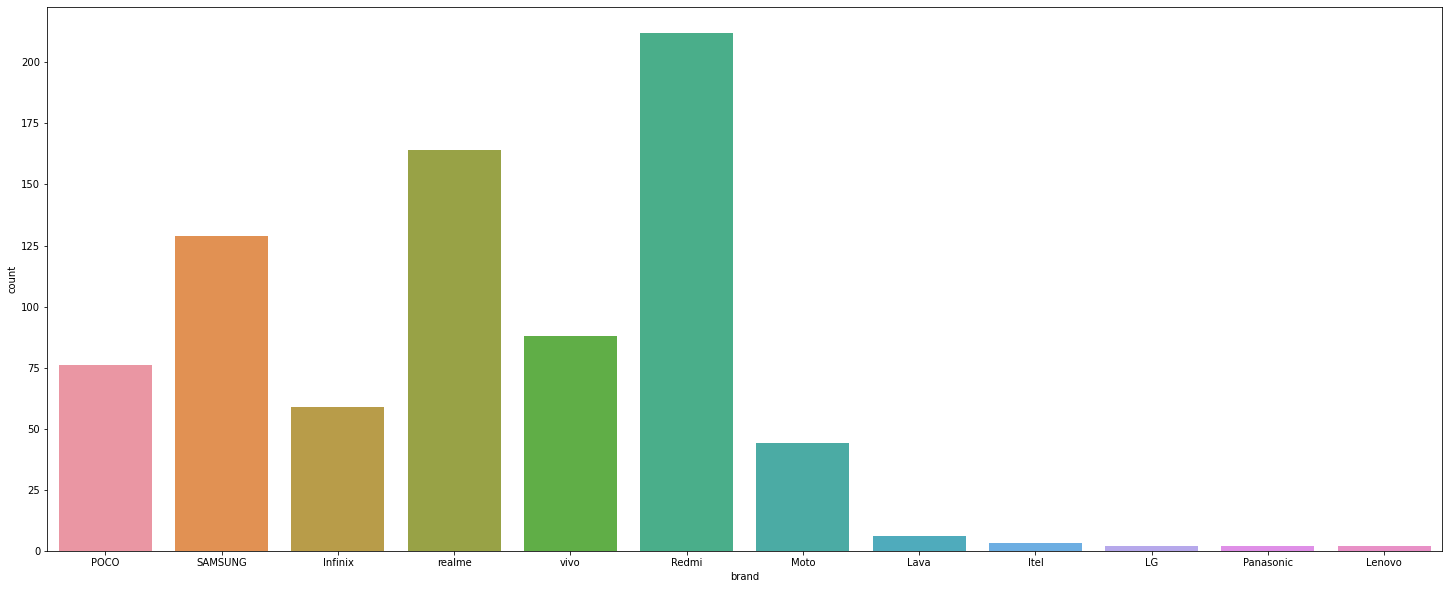

In [160]:
plt.figure(figsize=(25,10))
sns.countplot(mobile_df.brand)

<AxesSubplot:xlabel='rating', ylabel='count'>

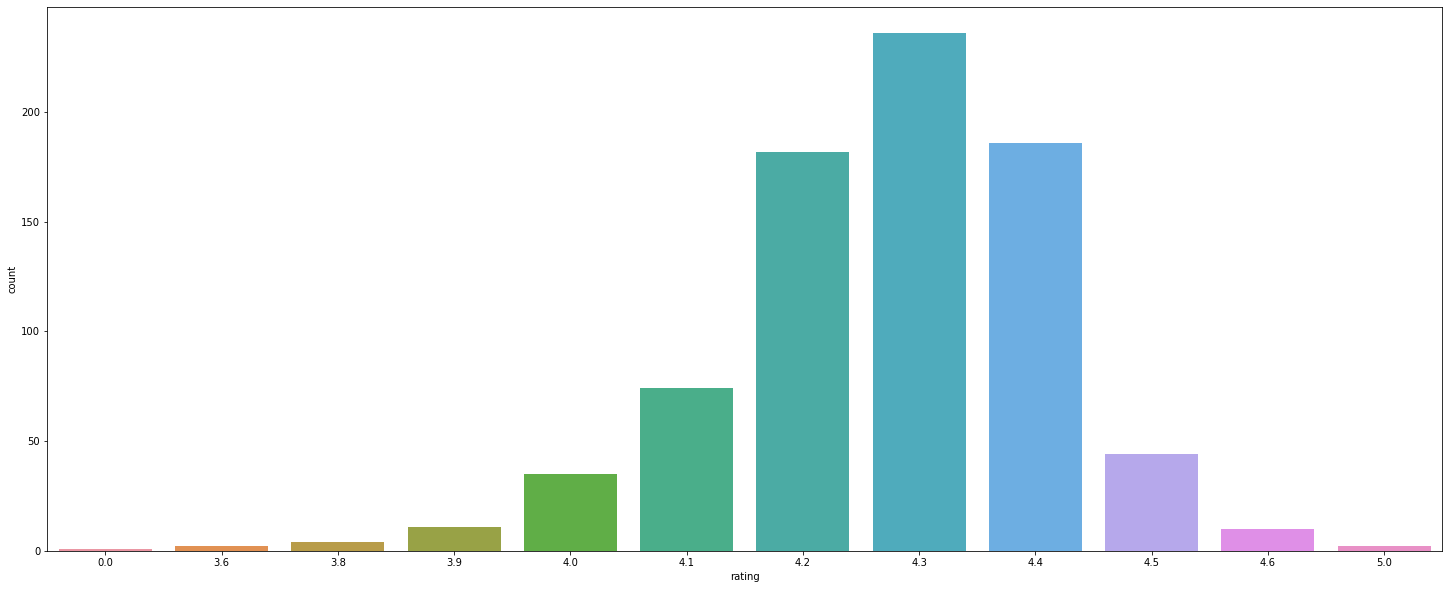

In [161]:
plt.figure(figsize=(25,10))
sns.countplot(mobile_df.rating)

<AxesSubplot:ylabel='price'>

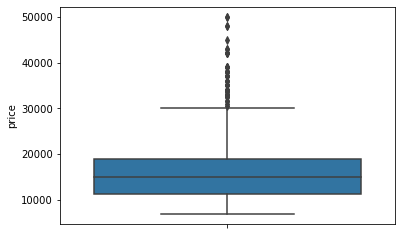

In [162]:
sns.boxplot(y=mobile_df['price'])

<AxesSubplot:ylabel='rating'>

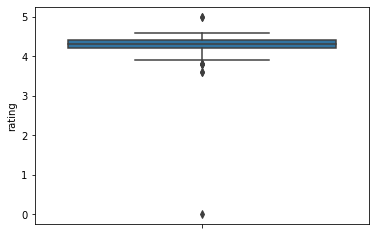

In [163]:
sns.boxplot(y=mobile_df['rating'])

### multivariate

<AxesSubplot:xlabel='brand', ylabel='price'>

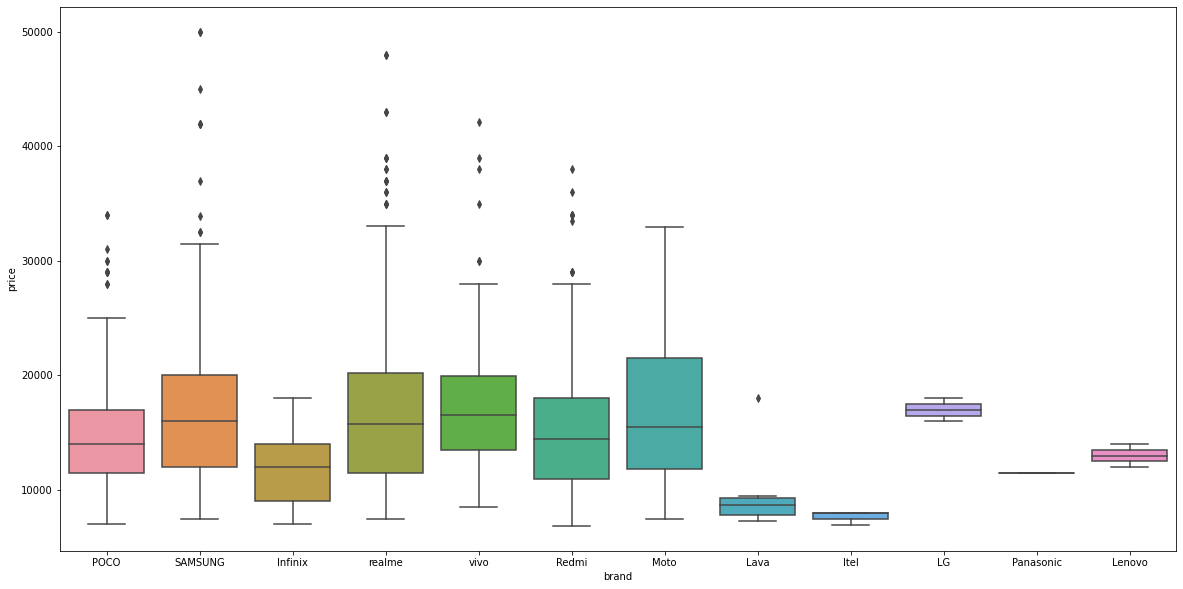

In [164]:
plt.figure(figsize=(20,10))
sns.boxplot(x = mobile_df.brand, y = mobile_df.price)

<AxesSubplot:xlabel='brand', ylabel='rating'>

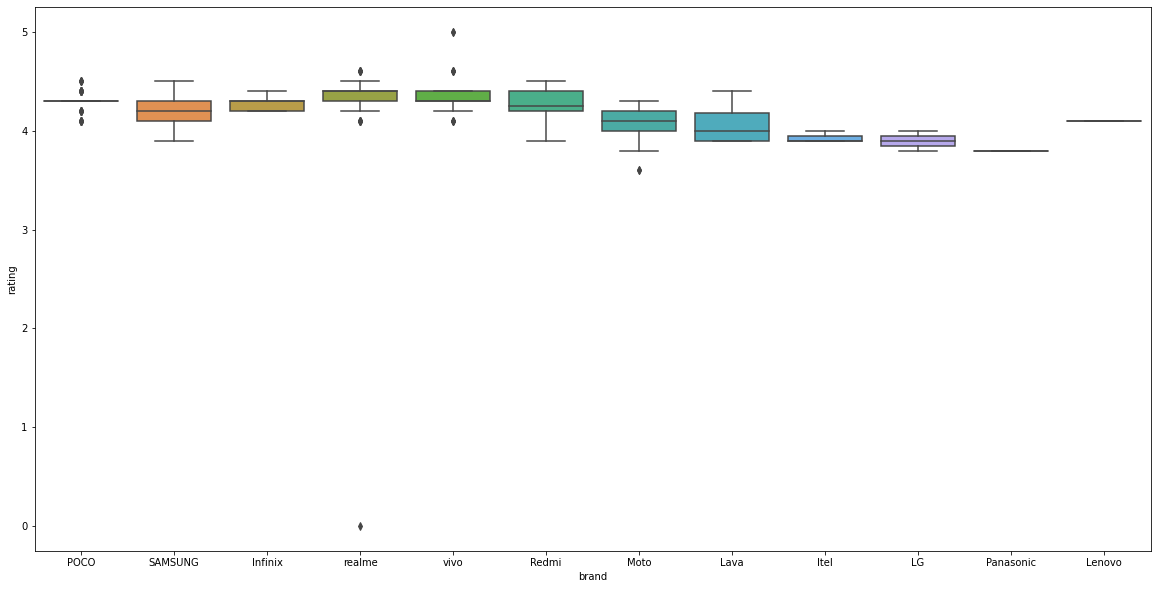

In [165]:
plt.figure(figsize=(20,10))
sns.boxplot(x = mobile_df.brand, y = mobile_df.rating)

<AxesSubplot:xlabel='brand', ylabel='price'>

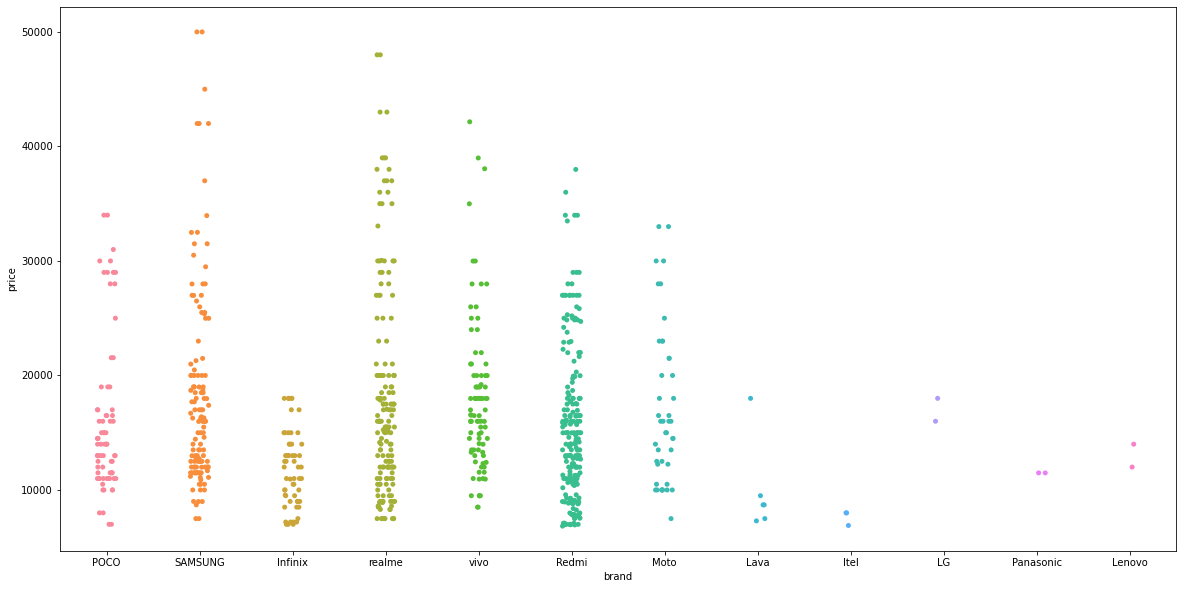

In [166]:
plt.figure(figsize=(20,10))
sns.stripplot(x = mobile_df.brand, y = mobile_df.price)